# Activity Recognition system based on Multisensor data fusion (AReM) Data Set

### https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+%28AReM%29#

In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import pickle
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve

## Reading and appending data for each activity

###  Bending 1 >> Number assigned= 0

In [107]:
cd bending1

C:\Users\nkeya\in_ML_class\activity_recognition\bending1


In [577]:
# ls

In [109]:
bend1_list=[]

In [110]:
for i in range(1,8):
    bd1=pd.read_csv(f'dataset{i}.csv',skiprows=4)
    bend1_list.append(bd1)

In [111]:
bend1=bend1_list[0]

In [112]:
bend1=bend1.append(bend1_list[1:],ignore_index=True)

In [113]:
bending1=bend1

In [114]:
bending1["activity"]="Bending1"

In [115]:
bending1["activity_num"]=0

In [116]:
bending1

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                   0      39.25       0.43      22.75       0.43      33.75   
1                 250      39.25       0.43      23.00       0.00      33.00   
2                 500      39.25       0.43      23.25       0.43      33.00   
3                 750      39.50       0.50      23.00       0.71      33.00   
4                1000      39.50       0.50      24.00       0.00      33.00   
...               ...        ...        ...        ...        ...        ...   
3355           118750      44.25       0.83      16.25       1.30      24.00   
3356           119000      44.00       0.71      11.00       1.00      24.00   
3357           119250      44.25       0.43      10.25       1.30      22.75   
3358           119500      43.75       0.43       7.33       2.87      21.50   
3359           119750      44.50       0.50       3.00       1.22      21.50   

      var_rss23  activity  activity_num  
0          1.30  Bending1             0  
1          0.00  Bending1             0  
2          0.00  Bending1             0  
3          0.00  Bending1             0  
4          0.00  Bending1             0  
...         ...       ...           ...  
3355       0.00  Bending1             0  
3356       0.00  Bending1             0  
3357       0.83  Bending1             0  
3358       0.50  Bending1             0  
3359       0.50  Bending1             0  

[3360 rows x 9 columns]

### Bending2  Number assigned >> 1

In [222]:
cd ..

C:\Users\nkeya\in_ML_class\activity_recognition


In [223]:
cd bending2

C:\Users\nkeya\in_ML_class\activity_recognition\bending2


In [578]:
# ls

In [226]:
bend2_list=[]

In [227]:
for i in range(1,7):
    if i==4:
        continue
    bd2=pd.read_csv(f'dataset{i}.csv',skiprows=4)
    bend2_list.append(bd2)

In [228]:
len(bend2_list)

5

In [239]:
bd4=pd.read_csv('dataset4.csv',skiprows=5,delimiter=" ",header=None)

In [240]:
bd4.columns=['# Columns: time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23','77']

In [241]:
bd4=bd4.drop(['77'],axis=1)

In [242]:
bd4

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      32.50       0.50       0.00       0.00      19.00   
1                250      32.50       0.50       0.00       0.00      18.50   
2                500      32.75       0.43       1.00       0.00      18.00   
3                750      32.50       0.50       0.00       0.00      17.50   
4               1000      32.50       0.50       7.50       0.50      17.50   
..               ...        ...        ...        ...        ...        ...   
475           118750      28.67       0.47       4.67       1.25      17.33   
476           119000      27.50       0.50       5.50       2.50      17.25   
477           119250      28.00       0.00       6.67       0.94      17.00   
478           119500      28.00       0.00       5.00       0.82      17.00   
479           119750      28.00       0.00       0.00       0.00      17.00   

     var_rss23  
0         1.00  
1         0.50  
2         0.00  
3         0.50  
4         0.87  
..         ...  
475       0.47  
476       1.30  
477       1.00  
478       0.71  
479       1.00  

[480 rows x 7 columns]

In [243]:
bend2=bd4

In [244]:
bend2=bend2.append(bend2_list[0:],ignore_index=True)

In [245]:
bending2=bend2

In [249]:
bending2["activity"]="Bending2"

In [250]:
bending2["activity_num"]=1

In [253]:
bending2

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                   0      32.50       0.50       0.00       0.00       19.0   
1                 250      32.50       0.50       0.00       0.00       18.5   
2                 500      32.75       0.43       1.00       0.00       18.0   
3                 750      32.50       0.50       0.00       0.00       17.5   
4                1000      32.50       0.50       7.50       0.50       17.5   
...               ...        ...        ...        ...        ...        ...   
2875           118750      27.00       0.00      14.00       0.00        6.5   
2876           119000      27.00       0.00      15.00       0.00        4.0   
2877           119250      27.00       0.00      14.25       0.83        4.0   
2878           119500      27.00       0.00      13.33       1.25        1.5   
2879           119750      26.50       0.50      15.00       0.00        3.0   

      var_rss23  activity  activity_num  
0          1.00  Bending2             1  
1          0.50  Bending2             1  
2          0.00  Bending2             1  
3          0.50  Bending2             1  
4          0.87  Bending2             1  
...         ...       ...           ...  
2875       0.50  Bending2             1  
2876       1.00  Bending2             1  
2877       2.00  Bending2             1  
2878       0.50  Bending2             1  
2879       0.00  Bending2             1  

[2880 rows x 9 columns]

### Cycling, number assigned=2

In [128]:
cd ..

C:\Users\nkeya\in_ML_class\activity_recognition


In [129]:
cd cycling

C:\Users\nkeya\in_ML_class\activity_recognition\cycling


In [579]:
# ls

In [131]:
cycle_list=[]

In [132]:
for i in range(1,16):
    cyl=pd.read_csv(f'dataset{i}.csv',skiprows=4)
    cycle_list.append(cyl)

In [133]:
cycle=cycle_list[0]

In [134]:
cycle=cycle.append(cycle_list[1:],ignore_index=True)

In [135]:
cycling=cycle

In [136]:
cycling["activity"]="Cycling"

In [137]:
cycling["activity_num"]=2

In [138]:
cycling

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                   0      32.00       4.85      17.50       3.35      22.50   
1                 250      40.50       1.12      14.00       2.24      21.75   
2                 500      40.50       2.60      11.33       4.50      18.25   
3                 750      34.50       1.50      20.67       2.87      19.00   
4                1000      34.50       1.50      21.25       3.27      18.25   
...               ...        ...        ...        ...        ...        ...   
7195           118750      38.00       2.55      18.25       2.17      20.00   
7196           119000      36.00       0.00      19.00       1.41      13.67   
7197           119250      37.00       1.73      17.75       0.43      22.50   
7198           119500      37.00       3.74      19.00       4.18      22.00   
7199           119750      38.75       1.92      16.75       3.49      21.00   

      var_rss23 activity  activity_num  
0          3.20  Cycling             2  
1          1.30  Cycling             2  
2          5.31  Cycling             2  
3          2.83  Cycling             2  
4          4.38  Cycling             2  
...         ...      ...           ...  
7195       4.74  Cycling             2  
7196       1.25  Cycling             2  
7197       0.87  Cycling             2  
7198       1.41  Cycling             2  
7199       3.67  Cycling             2  

[7200 rows x 9 columns]

### Lying, number assigned=3

In [139]:
cd ..

C:\Users\nkeya\in_ML_class\activity_recognition


In [140]:
cd lying

C:\Users\nkeya\in_ML_class\activity_recognition\lying


In [580]:
# ls

In [142]:
lye_list=[]

In [143]:
for i in range(1,16):
    lii=pd.read_csv(f'dataset{i}.csv',skiprows=4)
    lye_list.append(lii)

In [144]:
lyee=lye_list[0]

In [145]:
lyee=lyee.append(lye_list[1:],ignore_index=True)

In [146]:
lyings=lyee

In [147]:
lyings["activity"]="Lying"

In [148]:
lyings["activity_num"]=3

In [149]:
lyings

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                   0      29.00       0.00       9.00       0.71       8.50   
1                 250      29.00       0.00       8.00       0.71       8.50   
2                 500      29.00       0.00       8.00       0.71       8.00   
3                 750      28.50       0.50       8.25       0.43       8.75   
4                1000      29.00       0.00       8.75       1.09       9.00   
...               ...        ...        ...        ...        ...        ...   
7195           118750      29.25       0.43       4.00       0.00      10.50   
7196           119000      29.25       0.43       4.00       0.00      10.25   
7197           119250      29.50       0.50       2.33       0.94       9.67   
7198           119500      29.00       0.00       2.67       0.47      10.00   
7199           119750      29.00       0.00       2.75       0.43      11.00   

      var_rss23 activity  activity_num  
0          0.50    Lying             3  
1          0.50    Lying             3  
2          1.00    Lying             3  
3          0.43    Lying             3  
4          0.00    Lying             3  
...         ...      ...           ...  
7195       0.50    Lying             3  
7196       0.83    Lying             3  
7197       0.94    Lying             3  
7198       0.82    Lying             3  
7199       0.82    Lying             3  

[7200 rows x 9 columns]

### Sitting , number assigned=4

In [150]:
cd ..

C:\Users\nkeya\in_ML_class\activity_recognition


In [151]:
cd sitting

C:\Users\nkeya\in_ML_class\activity_recognition\sitting


In [581]:
# ls

In [153]:
sit_list=[]

In [154]:
for i in range(1,16):
    si=pd.read_csv(f'dataset{i}.csv',skiprows=4)
    sit_list.append(si)

In [155]:
sitt=sit_list[0]

In [156]:
sitt=sitt.append(sit_list[1:],ignore_index=True)

In [157]:
sitting=sitt

In [158]:
sitting["activity"]="Sitting"

In [159]:
sitting["activity_num"]=4

In [160]:
sitting

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                   0      42.00       0.00      19.20       0.98      15.50   
1                 250      42.00       0.00      19.33       0.94      11.00   
2                 500      42.00       0.00      17.50       0.50      12.50   
3                 750      42.00       0.00      17.00       1.41      13.33   
4                1000      42.00       0.00      17.50       0.87      12.00   
...               ...        ...        ...        ...        ...        ...   
7194           118750      41.00       0.82      17.25       1.30      11.00   
7195           119000      41.50       0.50      18.00       0.00      10.67   
7196           119250      41.33       0.47      18.67       0.47      11.00   
7197           119500      41.50       0.50      18.50       0.50      12.33   
7198           119750      41.50       0.50      17.00       1.00      13.50   

      var_rss23 activity  activity_num  
0          2.06  Sitting             4  
1          0.82  Sitting             4  
2          0.50  Sitting             4  
3          0.94  Sitting             4  
4          0.82  Sitting             4  
...         ...      ...           ...  
7194       0.82  Sitting             4  
7195       1.25  Sitting             4  
7196       1.41  Sitting             4  
7197       0.47  Sitting             4  
7198       1.12  Sitting             4  

[7199 rows x 9 columns]

### Standing number assigned=5

In [161]:
cd ..

C:\Users\nkeya\in_ML_class\activity_recognition


In [162]:
cd standing

C:\Users\nkeya\in_ML_class\activity_recognition\standing


In [163]:
stand_list=[]

In [582]:
# ls

In [165]:
for i in range(1,16):
    std=pd.read_csv(f'dataset{i}.csv',skiprows=4)
    stand_list.append(std)

In [166]:
stand=stand_list[0]

In [167]:
stand=stand.append(stand_list[1:],ignore_index=True)

In [168]:
standing=stand

In [169]:
standing["activity"]="standing"

In [170]:
standing["activity_num"]=5

In [171]:
standing

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                   0      46.50       0.50      11.50       0.50      20.33   
1                 250      46.50       0.50      12.00       0.00      20.25   
2                 500      46.50       0.50      12.00       0.00      20.50   
3                 750      46.50       0.50      12.75       0.43      19.50   
4                1000      46.50       0.50      13.25       0.43      18.75   
...               ...        ...        ...        ...        ...        ...   
7195           118750      45.25       0.43      12.25       0.43      13.75   
7196           119000      45.00       0.00      12.60       0.80      14.25   
7197           119250      45.00       0.00      12.00       0.00      14.50   
7198           119500      45.50       0.50      12.25       0.43      14.50   
7199           119750      45.00       0.00      12.50       0.87      14.00   

      var_rss23  activity  activity_num  
0          0.94  standing             5  
1          0.43  standing             5  
2          0.50  standing             5  
3          0.50  standing             5  
4          0.43  standing             5  
...         ...       ...           ...  
7195       0.83  standing             5  
7196       0.83  standing             5  
7197       0.50  standing             5  
7198       0.50  standing             5  
7199       0.71  standing             5  

[7200 rows x 9 columns]

### Walking number assigned=6

In [172]:
cd ..

C:\Users\nkeya\in_ML_class\activity_recognition


In [173]:
cd walking

C:\Users\nkeya\in_ML_class\activity_recognition\walking


In [583]:
# ls

In [175]:
walk_list=[]

In [176]:
for i in range(1,16):
    wal=pd.read_csv(f'dataset{i}.csv',skiprows=4)
    walk_list.append(wal)

In [177]:
walk=walk_list[0]

In [178]:
walk=walk.append(walk_list[1:],ignore_index=True)

In [179]:
walking=walk

In [180]:
walking["activity"]="Walking"

In [181]:
walking["activity_num"]=6

In [182]:
walking

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                   0      35.00       3.67      16.50       3.77      14.00   
1                 250      28.50       3.35      17.50       3.77      12.25   
2                 500      35.50       2.87      15.75       2.86      17.75   
3                 750      29.75      12.19      16.25       2.17      20.75   
4                1000      27.00       2.12      16.75       0.83      24.75   
...               ...        ...        ...        ...        ...        ...   
7195           118750      34.50       6.18       9.00       3.56      12.67   
7196           119000      25.75       6.02      13.75       2.05      16.00   
7197           119250      31.50       3.35      10.25       5.12      16.25   
7198           119500      33.75       2.77      14.00       3.24      13.75   
7199           119750      37.00       1.41      18.25       3.70      11.00   

      var_rss23 activity  activity_num  
0          1.63  Walking             6  
1          3.90  Walking             6  
2          5.07  Walking             6  
3          2.59  Walking             6  
4          1.64  Walking             6  
...         ...      ...           ...  
7195       4.19  Walking             6  
7196       1.58  Walking             6  
7197       2.95  Walking             6  
7198       0.43  Walking             6  
7199       4.32  Walking             6  

[7200 rows x 9 columns]

## Appending all the data for activities together

In [259]:
final_data=bending1

In [260]:
append_list=[bending2,cycling,lyings,sitting,standing,walking]

In [261]:
final_data=final_data.append(append_list,ignore_index=True)

In [262]:
final_data

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                    0      39.25       0.43      22.75       0.43      33.75   
1                  250      39.25       0.43      23.00       0.00      33.00   
2                  500      39.25       0.43      23.25       0.43      33.00   
3                  750      39.50       0.50      23.00       0.71      33.00   
4                 1000      39.50       0.50      24.00       0.00      33.00   
...                ...        ...        ...        ...        ...        ...   
42234           118750      34.50       6.18       9.00       3.56      12.67   
42235           119000      25.75       6.02      13.75       2.05      16.00   
42236           119250      31.50       3.35      10.25       5.12      16.25   
42237           119500      33.75       2.77      14.00       3.24      13.75   
42238           119750      37.00       1.41      18.25       3.70      11.00   

       var_rss23  activity  activity_num  
0           1.30  Bending1             0  
1           0.00  Bending1             0  
2           0.00  Bending1             0  
3           0.00  Bending1             0  
4           0.00  Bending1             0  
...          ...       ...           ...  
42234       4.19   Walking             6  
42235       1.58   Walking             6  
42236       2.95   Walking             6  
42237       0.43   Walking             6  
42238       4.32   Walking             6  

[42239 rows x 9 columns]

In [264]:
final_data.columns

Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23', 'activity', 'activity_num'],
      dtype='object')

In [265]:
final_data.rename(columns={'# Columns: time':'Time_series'},inplace=True)

In [267]:
f_edit=final_data.drop(['Time_series'],axis=1)

In [572]:
f_edit.describe()

avg_rss12     var_rss12     avg_rss13     var_rss13     avg_rss23  \
count  42239.000000  42239.000000  42239.000000  42239.000000  42239.000000   
mean      38.917264      1.459145     14.278160      1.502241     16.035170   
std        6.337280      2.047973      5.435483      1.639519      6.736022   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       35.000000      0.400000     11.330000      0.430000     12.000000   
50%       39.750000      0.500000     15.000000      0.830000     16.000000   
75%       43.750000      1.790000     18.000000      2.290000     19.250000   
max       56.250000     17.240000     35.000000     11.420000     40.330000   

          var_rss23  activity_num  
count  42239.000000  42239.000000  
mean       1.620705      3.477260  
std        1.637070      1.821487  
min        0.000000      0.000000  
25%        0.470000      2.000000  
50%        1.000000      4.000000  
75%        2.290000      5.000000  
max       13.610000      6.000000

In [268]:
ProfileReport(f_edit)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

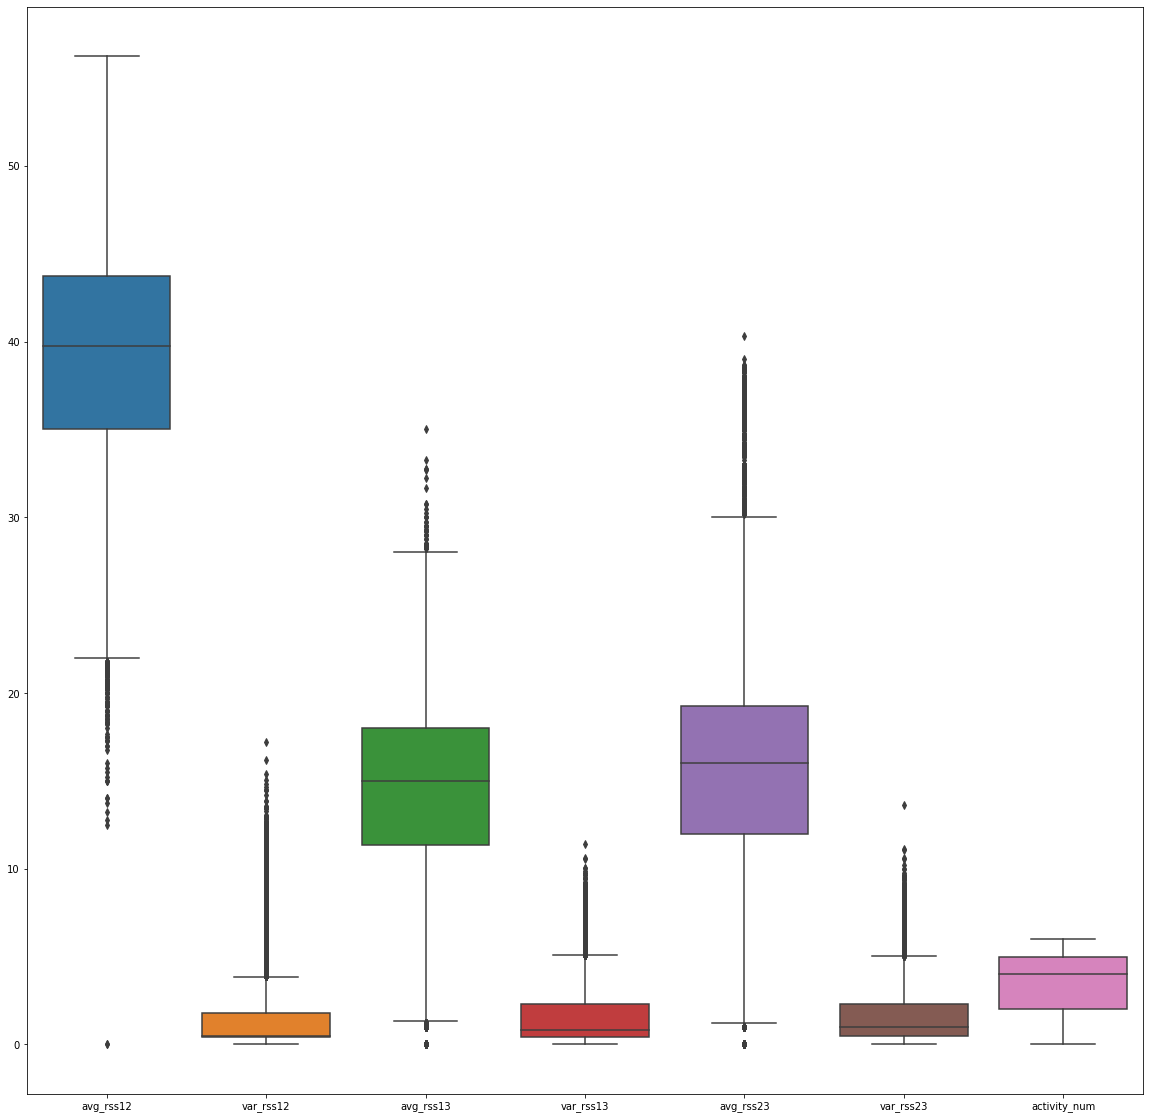

In [269]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=f_edit,ax=ax)

### Removing outliers

In [287]:
f_edit.columns

Index(['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23', 'activity', 'activity_num'],
      dtype='object')

In [443]:
q=f_edit['avg_rss23'].quantile(0.95)
f1_edit=f_edit[f_edit['avg_rss23']<q]

In [444]:
q=f_edit['avg_rss12'].quantile(0.01)
f1_edit=f1_edit[f1_edit['avg_rss12']>q]

In [445]:
# q=f_edit['var_rss12'].quantile(0.95)
# f1_edit=f1_edit[f1_edit['var_rss12']<q]

In [574]:
f1_edit

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
406        42.75       1.30      23.75       1.48      29.75       0.43   
407        42.00       0.00      21.67       0.47      29.67       0.47   
409        42.00       0.00      24.00       0.00      29.75       0.43   
410        42.00       0.00      22.50       0.50      29.75       0.43   
412        42.00       0.00      22.50       1.12      29.75       0.43   
...          ...        ...        ...        ...        ...        ...   
42234      34.50       6.18       9.00       3.56      12.67       4.19   
42235      25.75       6.02      13.75       2.05      16.00       1.58   
42236      31.50       3.35      10.25       5.12      16.25       2.95   
42237      33.75       2.77      14.00       3.24      13.75       0.43   
42238      37.00       1.41      18.25       3.70      11.00       4.32   

       activity  activity_num  
406    Bending1             0  
407    Bending1             0  
409    Bending1             0  
410    Bending1             0  
412    Bending1             0  
...         ...           ...  
42234   Walking             6  
42235   Walking             6  
42236   Walking             6  
42237   Walking             6  
42238   Walking             6  

[39597 rows x 8 columns]

<AxesSubplot:>

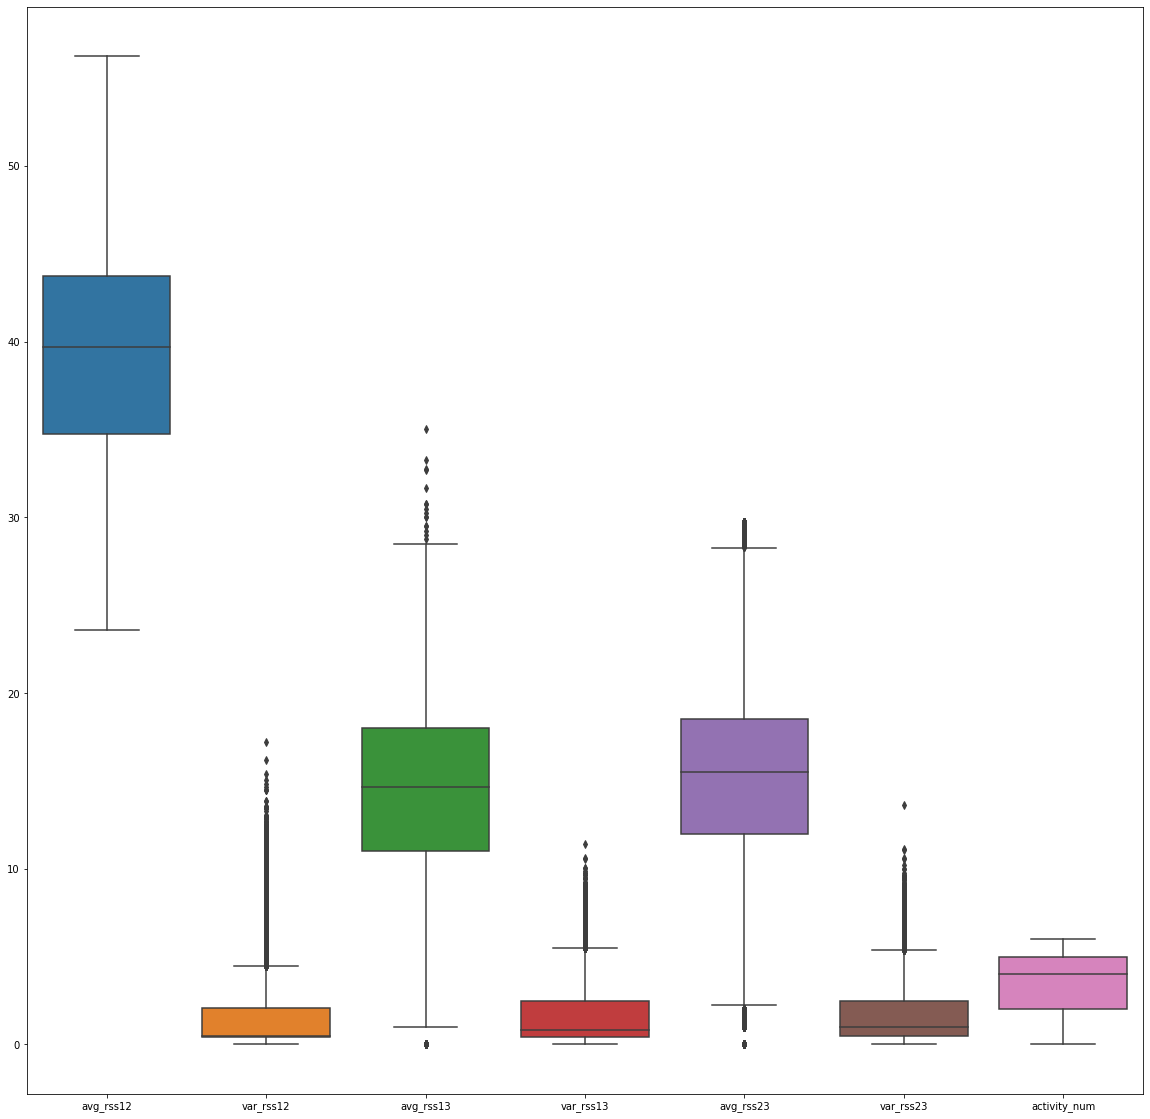

In [447]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=f1_edit,ax=ax)

In [448]:
ProfileReport(f1_edit)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [449]:
x=f1_edit.drop(["activity","activity_num"],axis=1)

In [450]:
y=f1_edit['activity_num']

In [451]:
scaler=StandardScaler()

In [452]:
x_scaled=scaler.fit_transform(x)

In [453]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.2,random_state=42)

### checking vif 

In [454]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])

In [455]:
vif_score(x)

FEATURE  VIF_SCORE
0  avg_rss12   1.202452
1  var_rss12   1.747673
2  avg_rss13   1.251060
3  var_rss13   1.680107
4  avg_rss23   1.219331
5  var_rss23   1.686591

<AxesSubplot:>

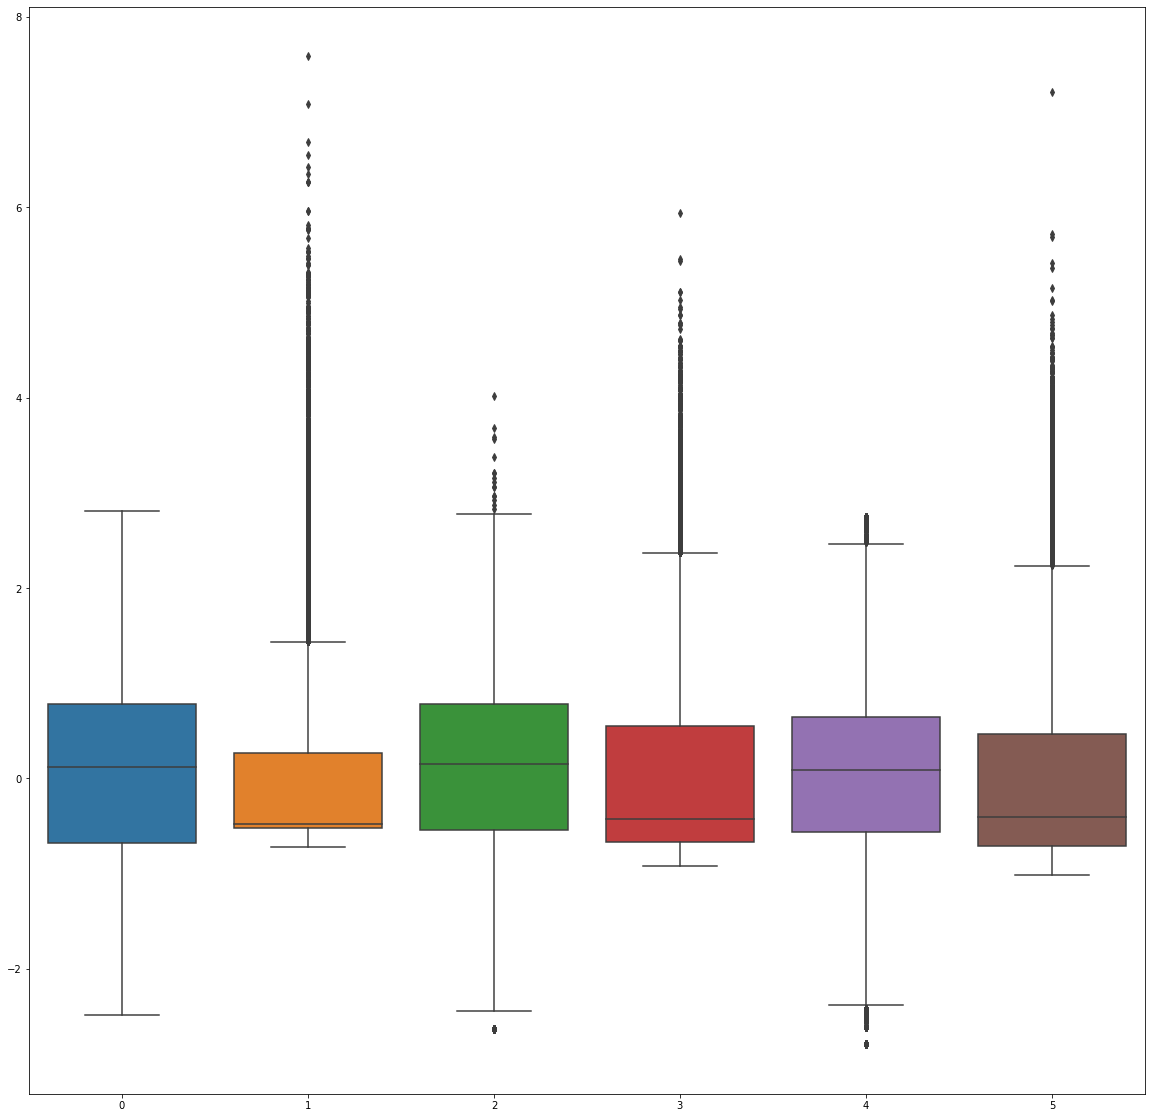

In [456]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=x_scaled,ax=ax)

### Model training and prediction

###  lbfgs solver

In [544]:
logi=LogisticRegression(multi_class="auto",solver="lbfgs",n_jobs=-1,max_iter=150,random_state=2)

In [545]:
logi.fit(x_train,y_train)

LogisticRegression(max_iter=150, n_jobs=-1, random_state=2)

In [546]:
y_pred=logi.predict(x_test)

In [547]:
accuracy_score(y_test,y_pred)

0.6611111111111111

In [548]:
confusion_matrix(y_test,y_pred)

array([[ 153,    1,   10,    0,  102,    2,    0],
       [  23,  348,   38,   51,   45,    0,    8],
       [   1,   15,  925,    1,   82,   16,  407],
       [   0,   46,    3, 1170,   21,  112,    3],
       [  48,   76,   42,  190,  757,  322,    8],
       [   4,    0,   20,  145,  385,  918,    6],
       [   0,   16,  427,    0,    8,    0,  965]], dtype=int64)

### newton-cg solver

In [549]:
logit1=LogisticRegression(solver="newton-cg",multi_class="multinomial",n_jobs=-1,random_state=2,max_iter=150)

In [550]:
logit1.fit(x_train,y_train)

LogisticRegression(max_iter=150, multi_class='multinomial', n_jobs=-1,
                   random_state=2, solver='newton-cg')

In [551]:
y_pred=logit1.predict(x_test)

In [552]:
accuracy_score(y_test,y_pred)

0.6611111111111111

In [553]:
confusion_matrix(y_test,y_pred)

array([[ 153,    1,   10,    0,  102,    2,    0],
       [  23,  348,   38,   51,   45,    0,    8],
       [   1,   15,  925,    1,   82,   16,  407],
       [   0,   46,    3, 1170,   21,  112,    3],
       [  48,   76,   42,  190,  757,  322,    8],
       [   4,    0,   20,  145,  385,  918,    6],
       [   0,   16,  427,    0,    8,    0,  965]], dtype=int64)

### SAG solver

In [554]:
logit2=LogisticRegression(solver="sag",multi_class="auto",n_jobs=-1,random_state=2,max_iter=125)

In [555]:
logit2.fit(x_train,y_train)

LogisticRegression(max_iter=125, n_jobs=-1, random_state=2, solver='sag')

In [556]:
y_pred=logit2.predict(x_test)

In [557]:
accuracy_score(y_test,y_pred)

0.6609848484848485

In [558]:
confusion_matrix(y_test,y_pred)

array([[ 153,    1,   10,    0,  102,    2,    0],
       [  23,  348,   38,   51,   45,    0,    8],
       [   1,   15,  924,    1,   82,   16,  408],
       [   0,   46,    2, 1170,   21,  112,    4],
       [  48,   76,   42,  190,  757,  322,    8],
       [   4,    0,   20,  145,  385,  918,    6],
       [   0,   16,  427,    0,    8,    0,  965]], dtype=int64)

### SAGA solver

In [559]:
logit3=LogisticRegression(solver="saga",multi_class="multinomial",n_jobs=-1,random_state=25,max_iter=125)

In [560]:
logit3.fit(x_train,y_train)

LogisticRegression(max_iter=125, multi_class='multinomial', n_jobs=-1,
                   random_state=25, solver='saga')

In [561]:
y_pred=logit3.predict(x_test)

In [562]:
accuracy_score(y_test,y_pred)

0.6609848484848485

In [515]:
confusion_matrix(y_test,y_pred)

array([[ 154,    1,    9,    0,  102,    2,    0],
       [  23,  345,   36,   54,   47,    0,    8],
       [   1,   17,  922,    1,   85,   16,  405],
       [   0,   46,    3, 1179,   15,  109,    3],
       [  48,   76,   41,  195,  750,  326,    7],
       [   4,    0,   18,  153,  381,  917,    5],
       [   0,   16,  427,    0,    8,    0,  965]], dtype=int64)

### sag solver with class_weight=balanced.

In [563]:
logit4=LogisticRegression(multi_class="auto",solver="sag",n_jobs=-1,max_iter=150,random_state=24,class_weight="balanced")

In [564]:
logit4.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=150, n_jobs=-1,
                   random_state=24, solver='sag')

In [565]:
y_pred=logit4.predict(x_test)

In [566]:
accuracy_score(y_test,y_pred)

0.6392676767676768

### lbgfs solver with class_weight=balanced

In [567]:
logit5=LogisticRegression(multi_class="auto",solver="lbfgs",n_jobs=-1,max_iter=150,random_state=24,class_weight="balanced")

In [568]:
logit5.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=150, n_jobs=-1,
                   random_state=24)

In [569]:
y_pred=logit5.predict(x_test)

In [570]:
accuracy_score(y_test,y_pred)

0.6392676767676768